### Checking the integrity of training data generated by `DL_PREP.py`

In [ ]:
from py_env_train import *

#load the training data
files=os.listdir(TRAIN_FILES)
file=files[0]
train_files=np.load(TRAIN_FILES+"/"+file)

train_x=train_files["train_x"]
train_y=train_files["train_y"]
train_m=train_files["train_m"]
val_x=train_files["val_x"]
val_y=train_files["val_y"]
val_m=train_files["val_m"]
#canvas_x=train_files["canvas_x"]
#canvas_y=train_files["canvas_y"]
#canvas_m=train_files["canvas_m"]

print(file+ " Loaded!")

2024-05-16 11:04:59.042629: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-16 11:05:00.824579: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-05-16 11:05:00.824616: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-05-16 11:05:15.781879: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-

### 1. Check the shapes and peek into data:

In [26]:
import matplotlib.pyplot as plt

# Check shape of training and validation data
print("Shape of train_x:", train_x.shape)
print("Shape of train_y:", train_y.shape)
print("Shape of train_m:", train_m.shape)
print("Shape of val_x:", val_x.shape)
print("Shape of val_y:", val_y.shape)
print("Shape of val_m:", val_m.shape)

train_x[:3, 125, 100, 6]


print ("checking minimum maximum values")

print("minimum train_x: " + str(np.nanmin(train_x[:, ..., 0])))
print("maximum train_x: " + str(np.nanmax(train_x[:, ..., 0])))
print("minimum train_y: " + str(np.nanmin(train_y[:, ..., 0])))
print("maximum train_y: " + str(np.nanmax(train_y[:, ..., 0])))
print("minimum train_m: " + str(np.nanmin(train_m[:, ..., 0])))
print("maximum train_m: " + str(np.nanmax(train_m[:, ..., 0])))
print("minimum val_x: " + str(np.nanmin(val_x[:, ..., 0])))
print("maximum val_x: " + str(np.nanmax(val_x[:, ..., 0])))
print("minimum val_y: " + str(np.nanmin(val_y[:, ..., 0])))
print("maximum val_y: " + str(np.nanmax(val_y[:, ..., 0])))
print("minimum val_m: " + str(np.nanmin(val_m[:, ..., 0])))
print("maximum val_m: " + str(np.nanmax(val_m[:, ..., 0])))
#print("minimum canvas_x: " + str(np.nanmin(canvas_x[:, ..., 0])))
#print("maximum canvas_x: " + str(np.nanmax(canvas_x[:, ..., 0])))
#print("minimum canvas_y: " + str(np.nanmin(canvas_y[:, ..., 0])))
#print("maximum canvas_y: " + str(np.nanmax(canvas_y[:, ..., 0])))
#print("minimum canvas_m: " + str(np.nanmin(canvas_m[:, ..., 0])))
#print("maximum canvas_m: " + str(np.nanmax(canvas_m[:, ..., 0])))
#print("average canvas_m: " + str(np.nanmean(canvas_m[:, ..., 0])))

Shape of train_x: (13110, 128, 256, 7)
Shape of train_y: (13110, 128, 256, 1)
Shape of train_m: (13110, 128, 256, 1)
Shape of val_x: (4380, 128, 256, 7)
Shape of val_y: (4380, 128, 256, 1)
Shape of val_m: (4380, 128, 256, 1)
checking minimum maximum values
minimum train_x: -0.03192487
maximum train_x: 95.02233
minimum train_y: -39.79074
maximum train_y: 94.49778
minimum train_m: 0.0
maximum train_m: 1.0
minimum val_x: -0.030730505
maximum val_x: 94.19881
minimum val_y: -36.211872
maximum val_y: 93.641785
minimum val_m: 0.0
maximum val_m: 1.0


### 2. Check maps of channels in a time_index

#### 2.1. train_x

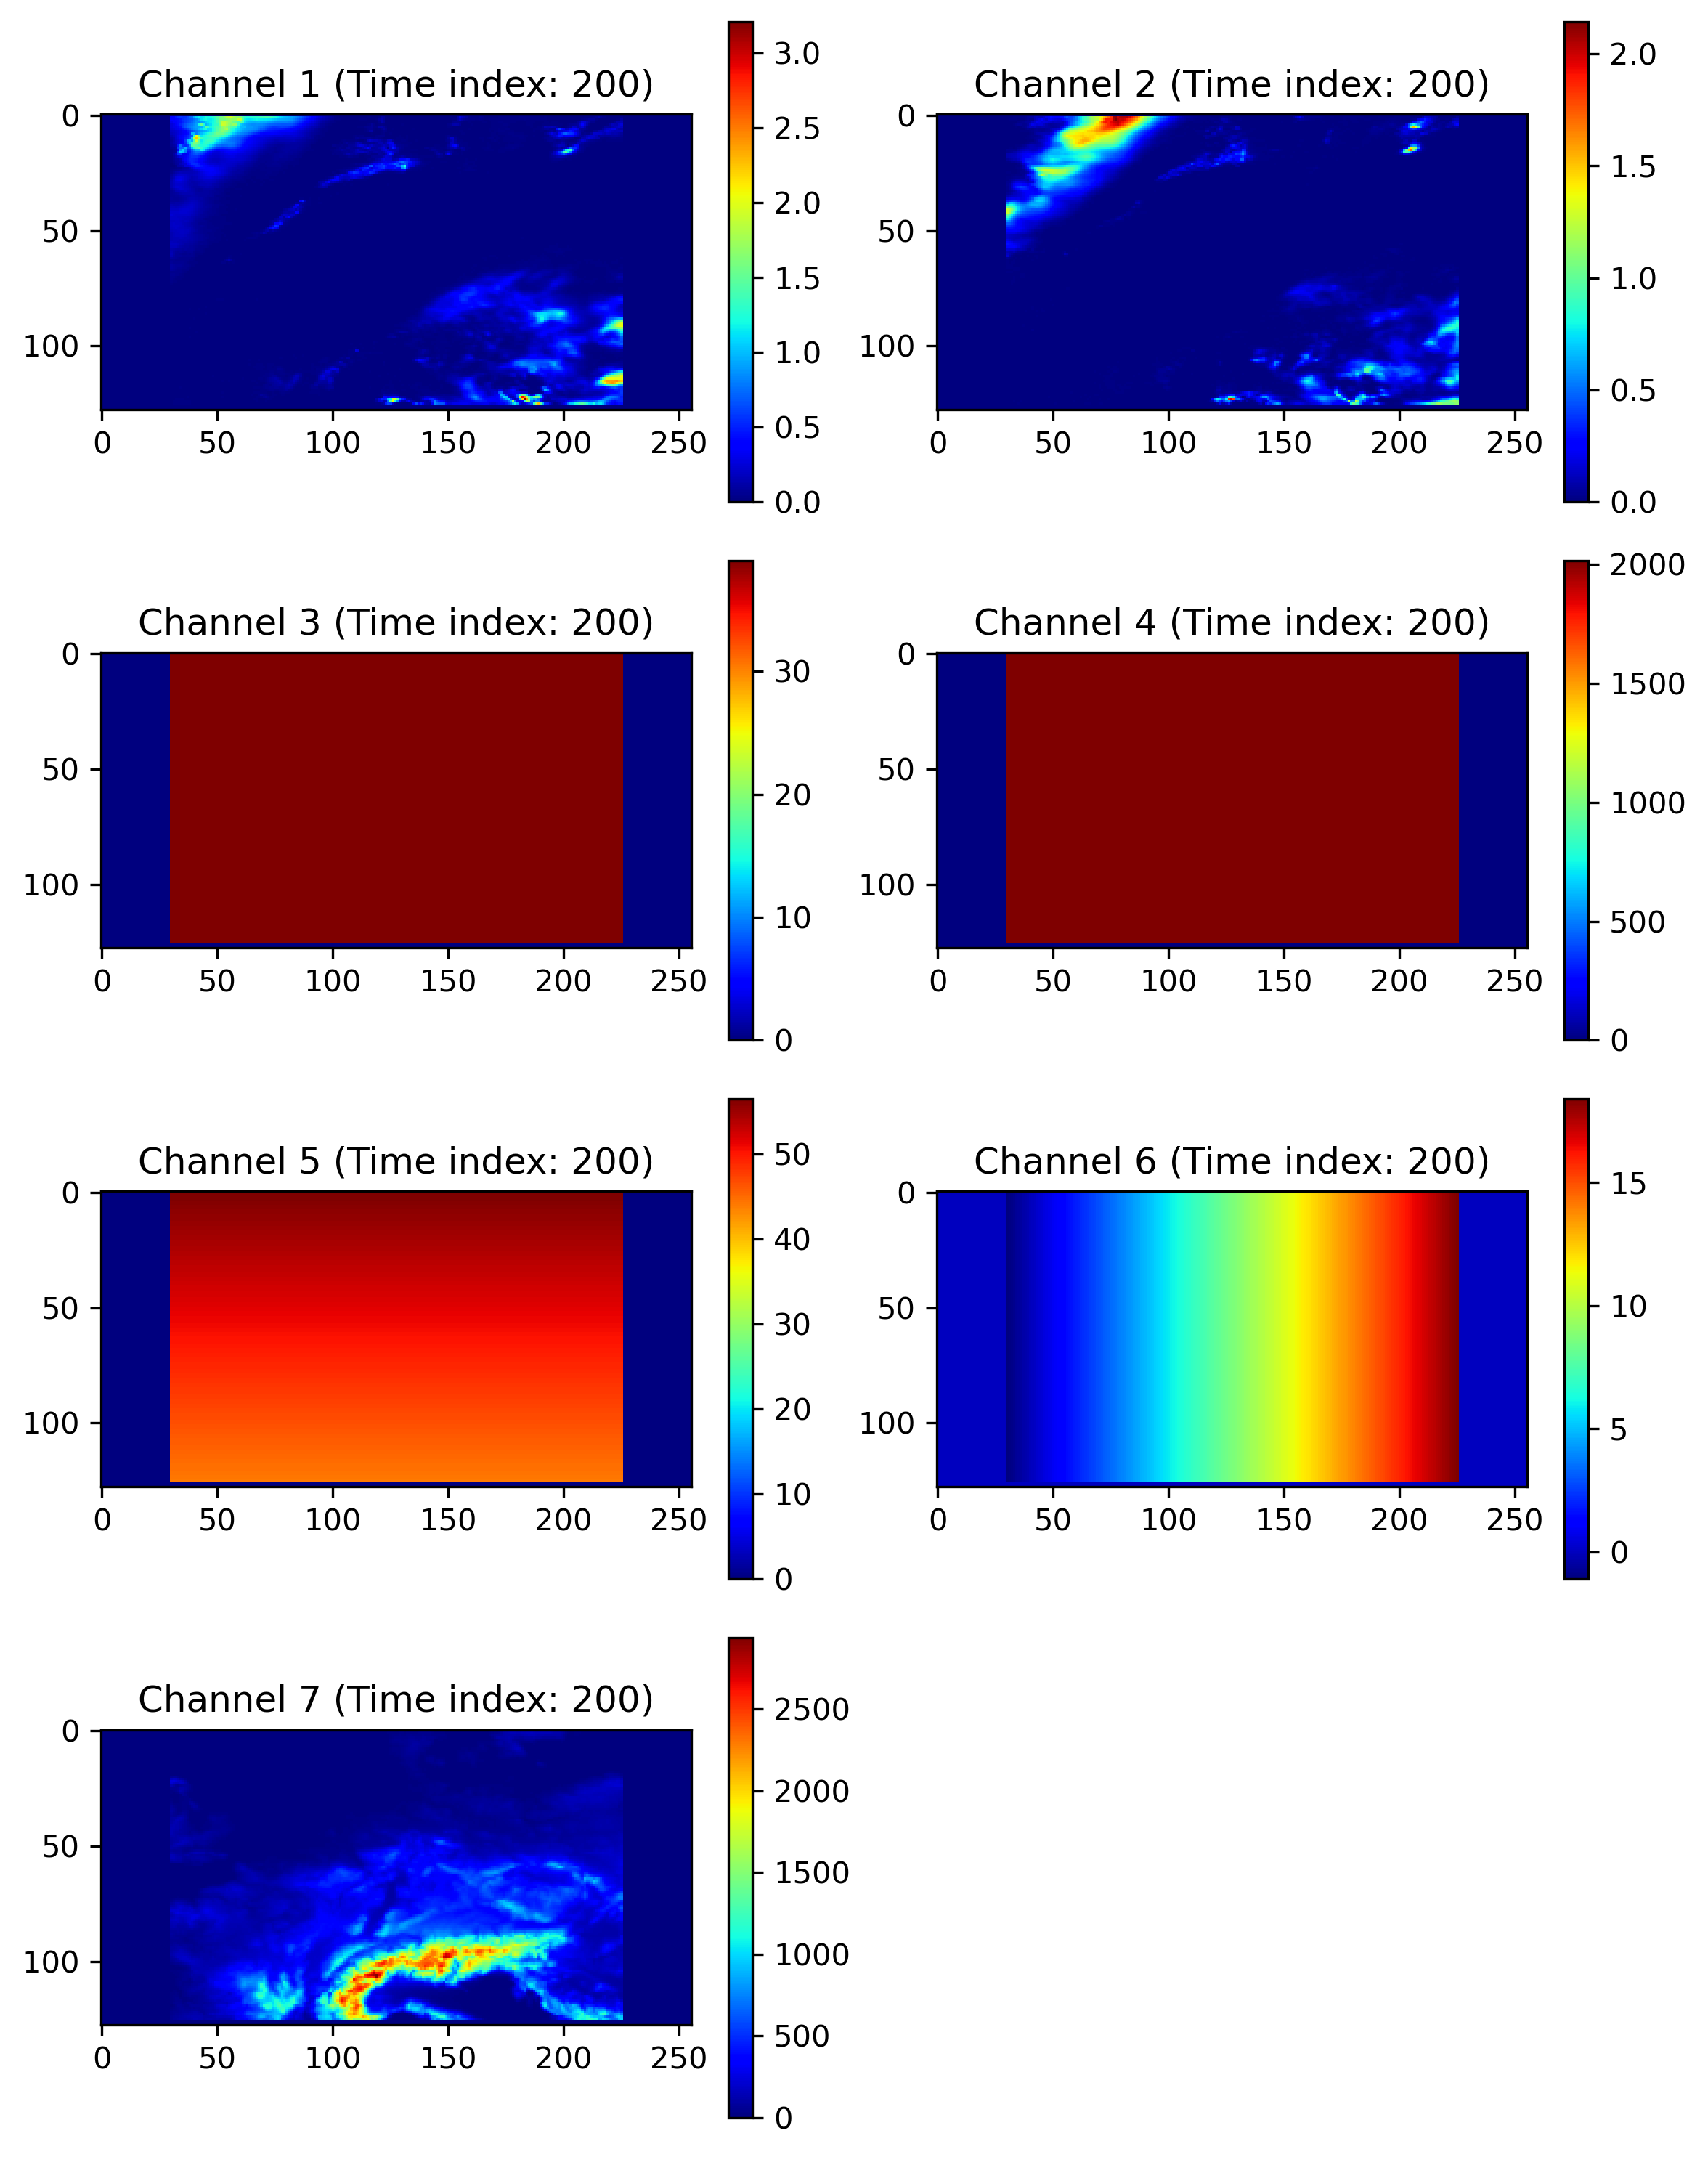

In [27]:
import matplotlib.pyplot as plt

n_channels=7

# Close all previously opened figures
plt.close('all')

# Specify the time index for the example maps
time_index = 200

# Set the number of columns for the panel
n_columns = 2

# Calculate the number of rows needed based on the number of channels
n_rows = (n_channels + n_columns - 1) // n_columns

# Create the panel of subplots
fig, axes = plt.subplots(n_rows, n_columns, figsize=(8, 10), dpi=300)

# Flatten the axes array if it has more than one dimension
if n_rows > 1:
    axes = axes.flatten()

# Plot example maps for each channel
for channel_idx in range(n_channels):
    # Select the current axis for the subplot
    ax = axes[channel_idx]

    # Get channel data
    channel_data = train_x[time_index, :, :, channel_idx]

    # Plot the channel map
    im = ax.imshow(channel_data, cmap='jet')
    ax.set_title(f"Channel {channel_idx+1} (Time index: {time_index})")
    plt.colorbar(im, ax=ax)

# Hide any empty subplots
for i in range(n_channels, n_rows * n_columns):
    axes[i].axis('off')

# Adjust spacing between subplots
fig.tight_layout()

# Display the panel of subplots
plt.show()


#### 2.2. val_x

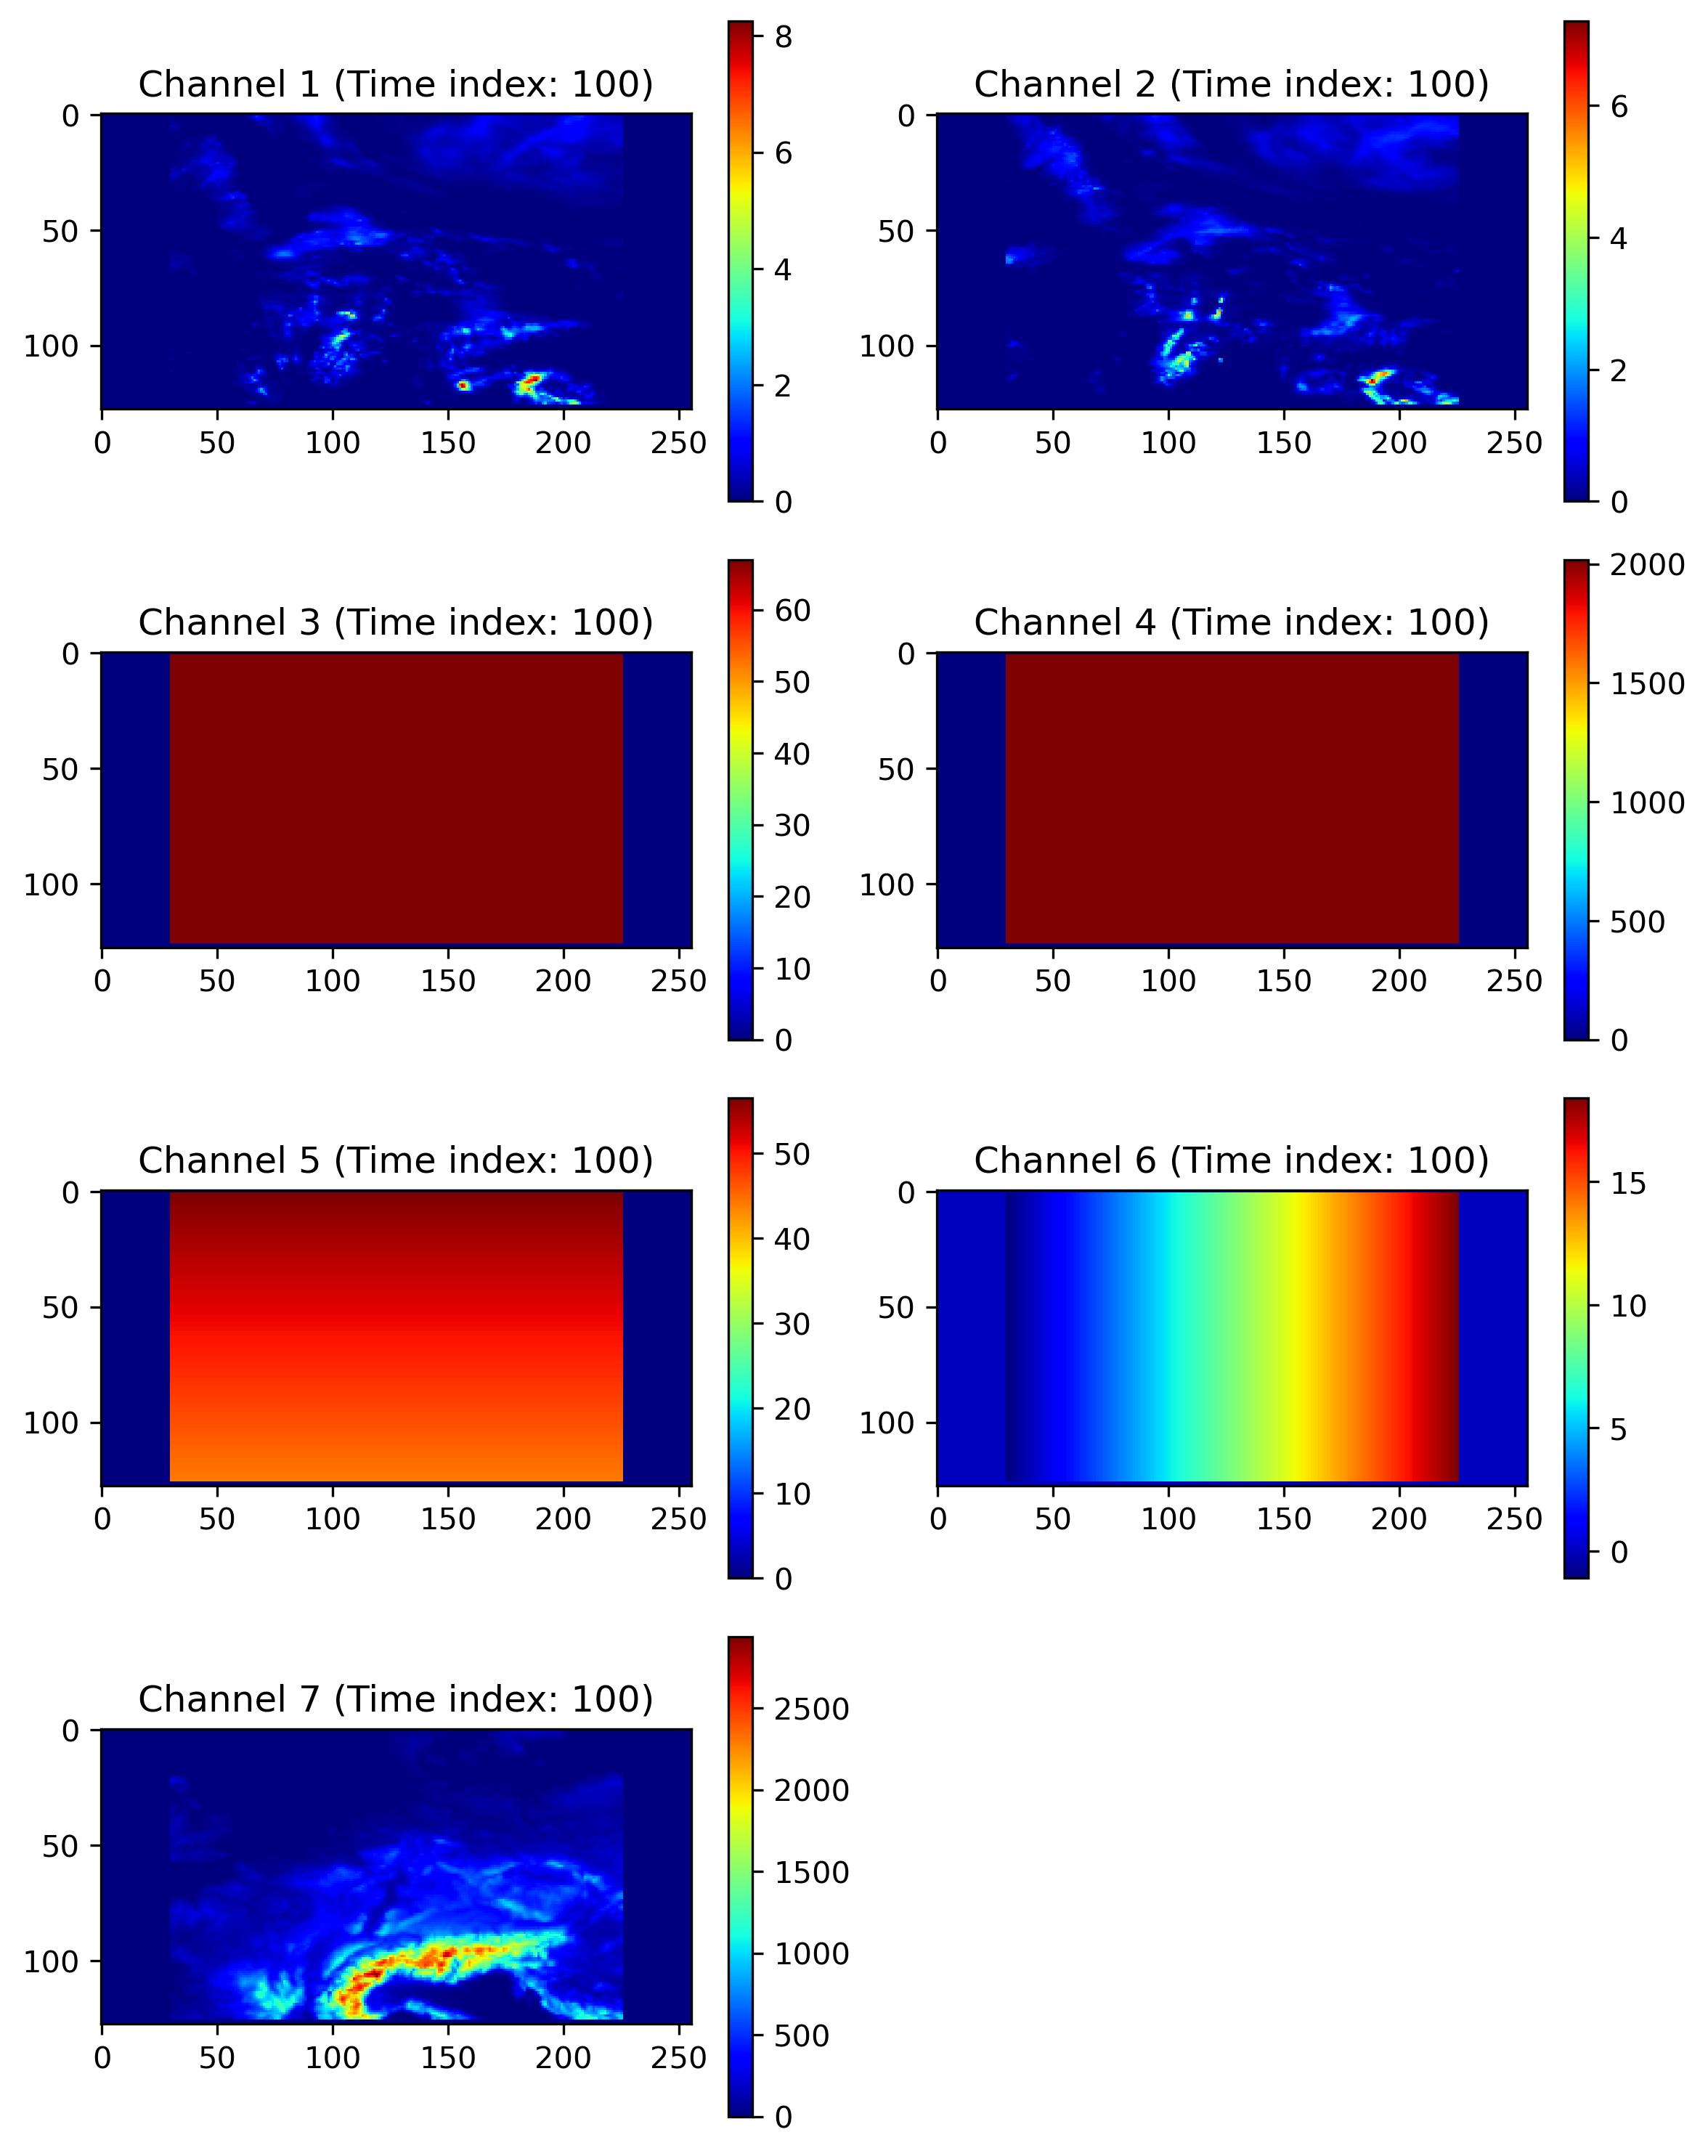

In [28]:
import matplotlib.pyplot as plt

# Close all previously opened figures
plt.close('all')

# Specify the time index for the example maps
time_index = 100

# Set the number of columns for the panel
n_columns = 2

# Calculate the number of rows needed based on the number of channels
n_rows = (n_channels + n_columns - 1) // n_columns

# Create the panel of subplots
fig, axes = plt.subplots(n_rows, n_columns, figsize=(8, 10), dpi=300)

# Flatten the axes array if it has more than one dimension
if n_rows > 1:
    axes = axes.flatten()

# Plot example maps for each channel
for channel_idx in range(n_channels):
    # Select the current axis for the subplot
    ax = axes[channel_idx]

    # Get channel data
    channel_data = val_x[time_index, :, :, channel_idx]

    # Plot the channel map
    im = ax.imshow(channel_data, cmap='jet')
    ax.set_title(f"Channel {channel_idx+1} (Time index: {time_index})")
    plt.colorbar(im, ax=ax)

# Hide any empty subplots
for i in range(n_channels, n_rows * n_columns):
    axes[i].axis('off')

# Adjust spacing between subplots
fig.tight_layout()

# Display the panel of subplots
plt.show()


### 3. Check precipitation numbers (float16):

#### 3.1 train_x

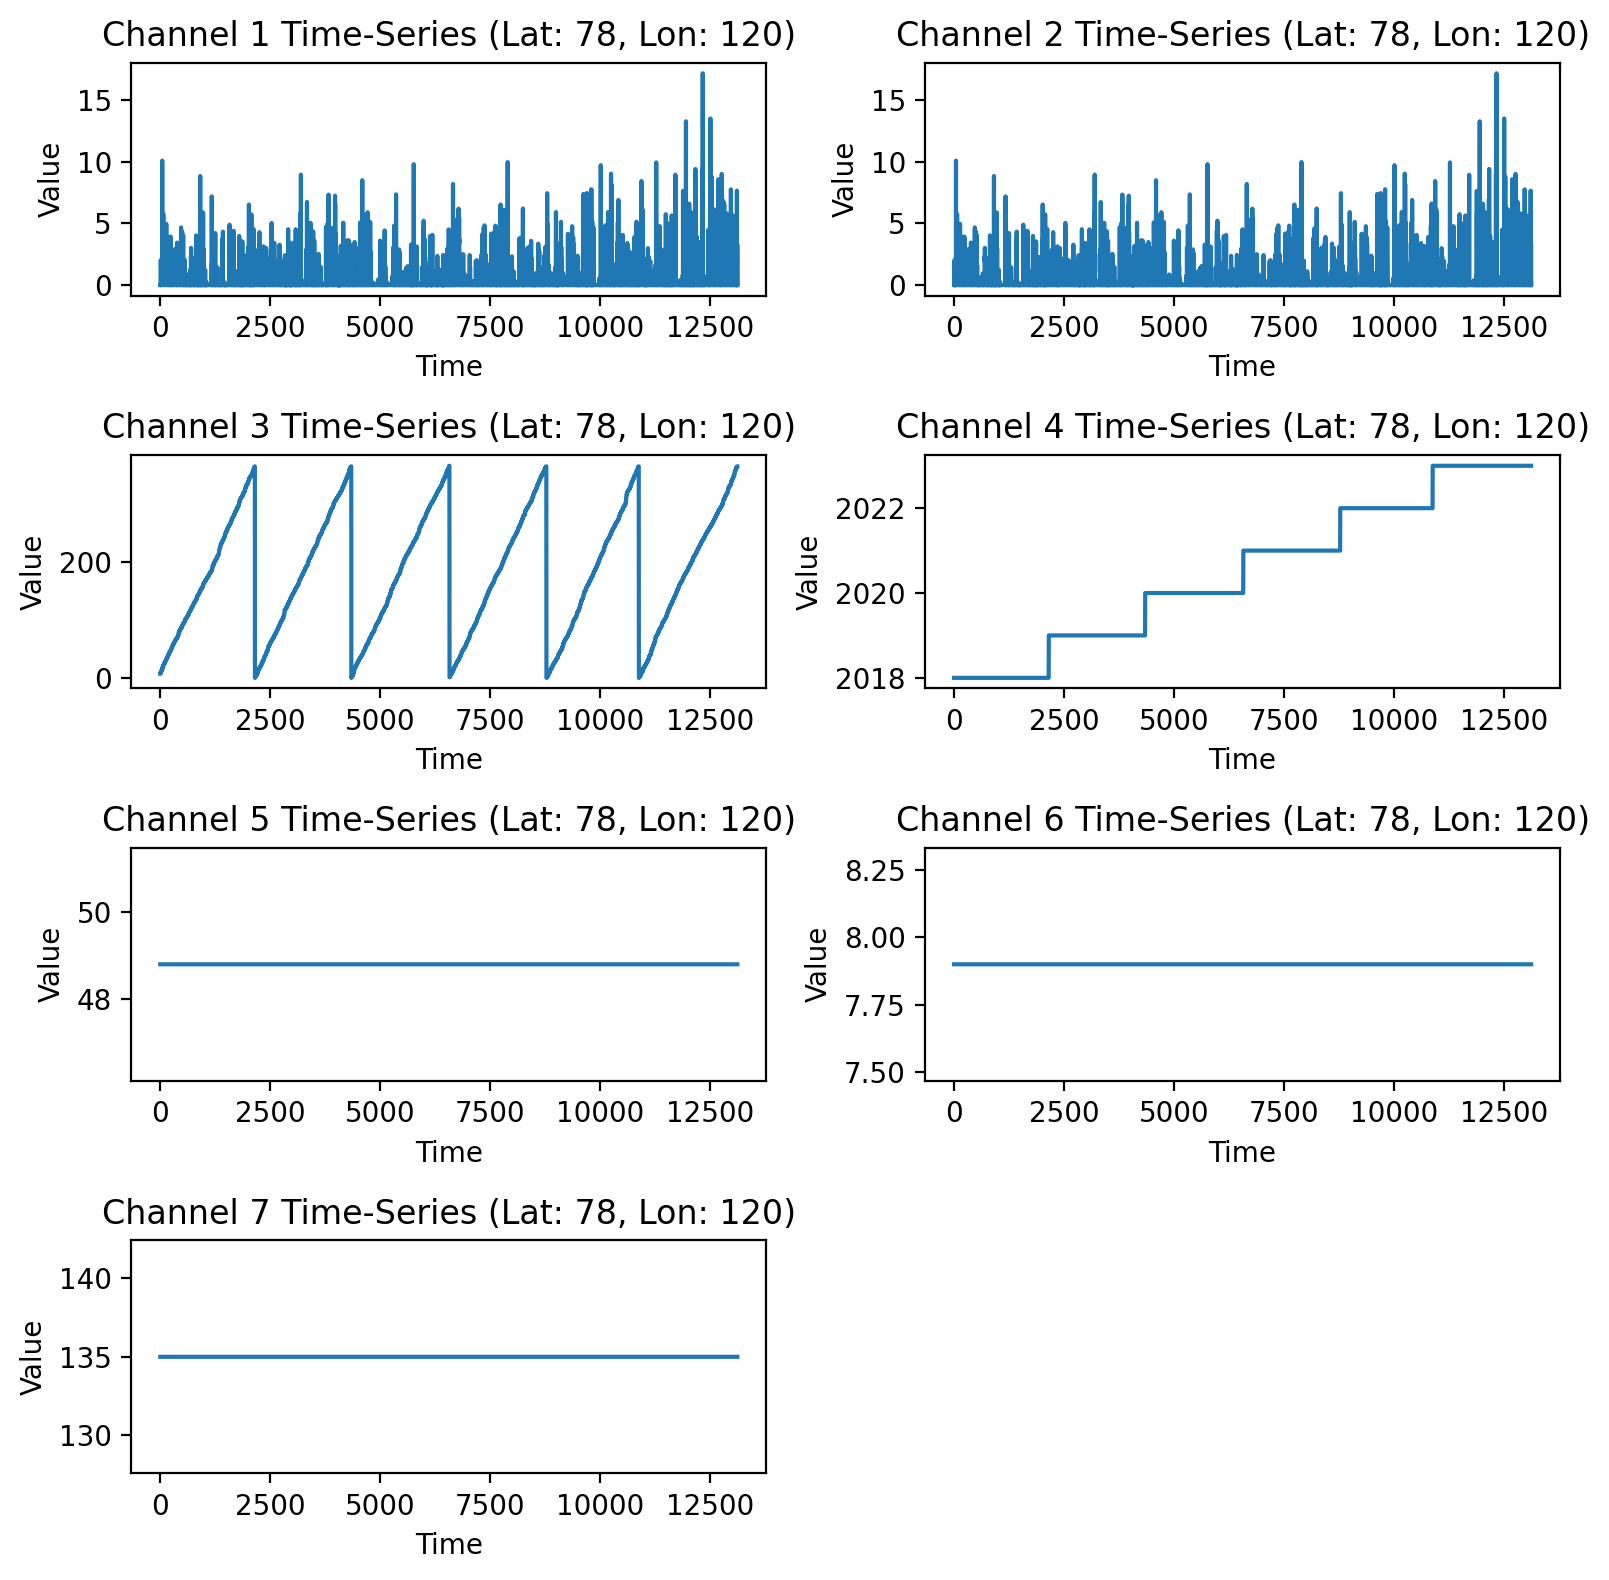

In [16]:
import random
import matplotlib.pyplot as plt

# Select a random pixel (latitude and longitude)
random_lat = random.randint(0, train_x.shape[1]-1)
random_lon = random.randint(0, train_x.shape[2]-1)

# Set the number of columns for the panel
n_columns = 2

# Calculate the number of rows needed based on the number of channels
n_rows = (n_channels + n_columns - 1) // n_columns

# Create the panel of subplots
fig, axes = plt.subplots(n_rows, n_columns, figsize=(8, 8), dpi=200)

# Flatten the axes array if it has more than one dimension
if n_rows > 1:
    axes = axes.flatten()

# Plot time-series for the random pixel in all channels
for channel_idx in range(n_channels):
    # Select the current axis for the subplot
    ax = axes[channel_idx]

    # Get channel data
    channel_data = train_x[:, random_lat, random_lon, channel_idx]

    # Plot the channel time-series
    ax.plot(channel_data)
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')
    ax.set_title(f"Channel {channel_idx+1} Time-Series (Lat: {random_lat}, Lon: {random_lon})")

# Hide any empty subplots
for i in range(n_channels, n_rows * n_columns):
    axes[i].axis('off')

# Adjust spacing between subplots
fig.tight_layout()

# Display the panel of subplots
plt.show()


#### 3.2 val_x

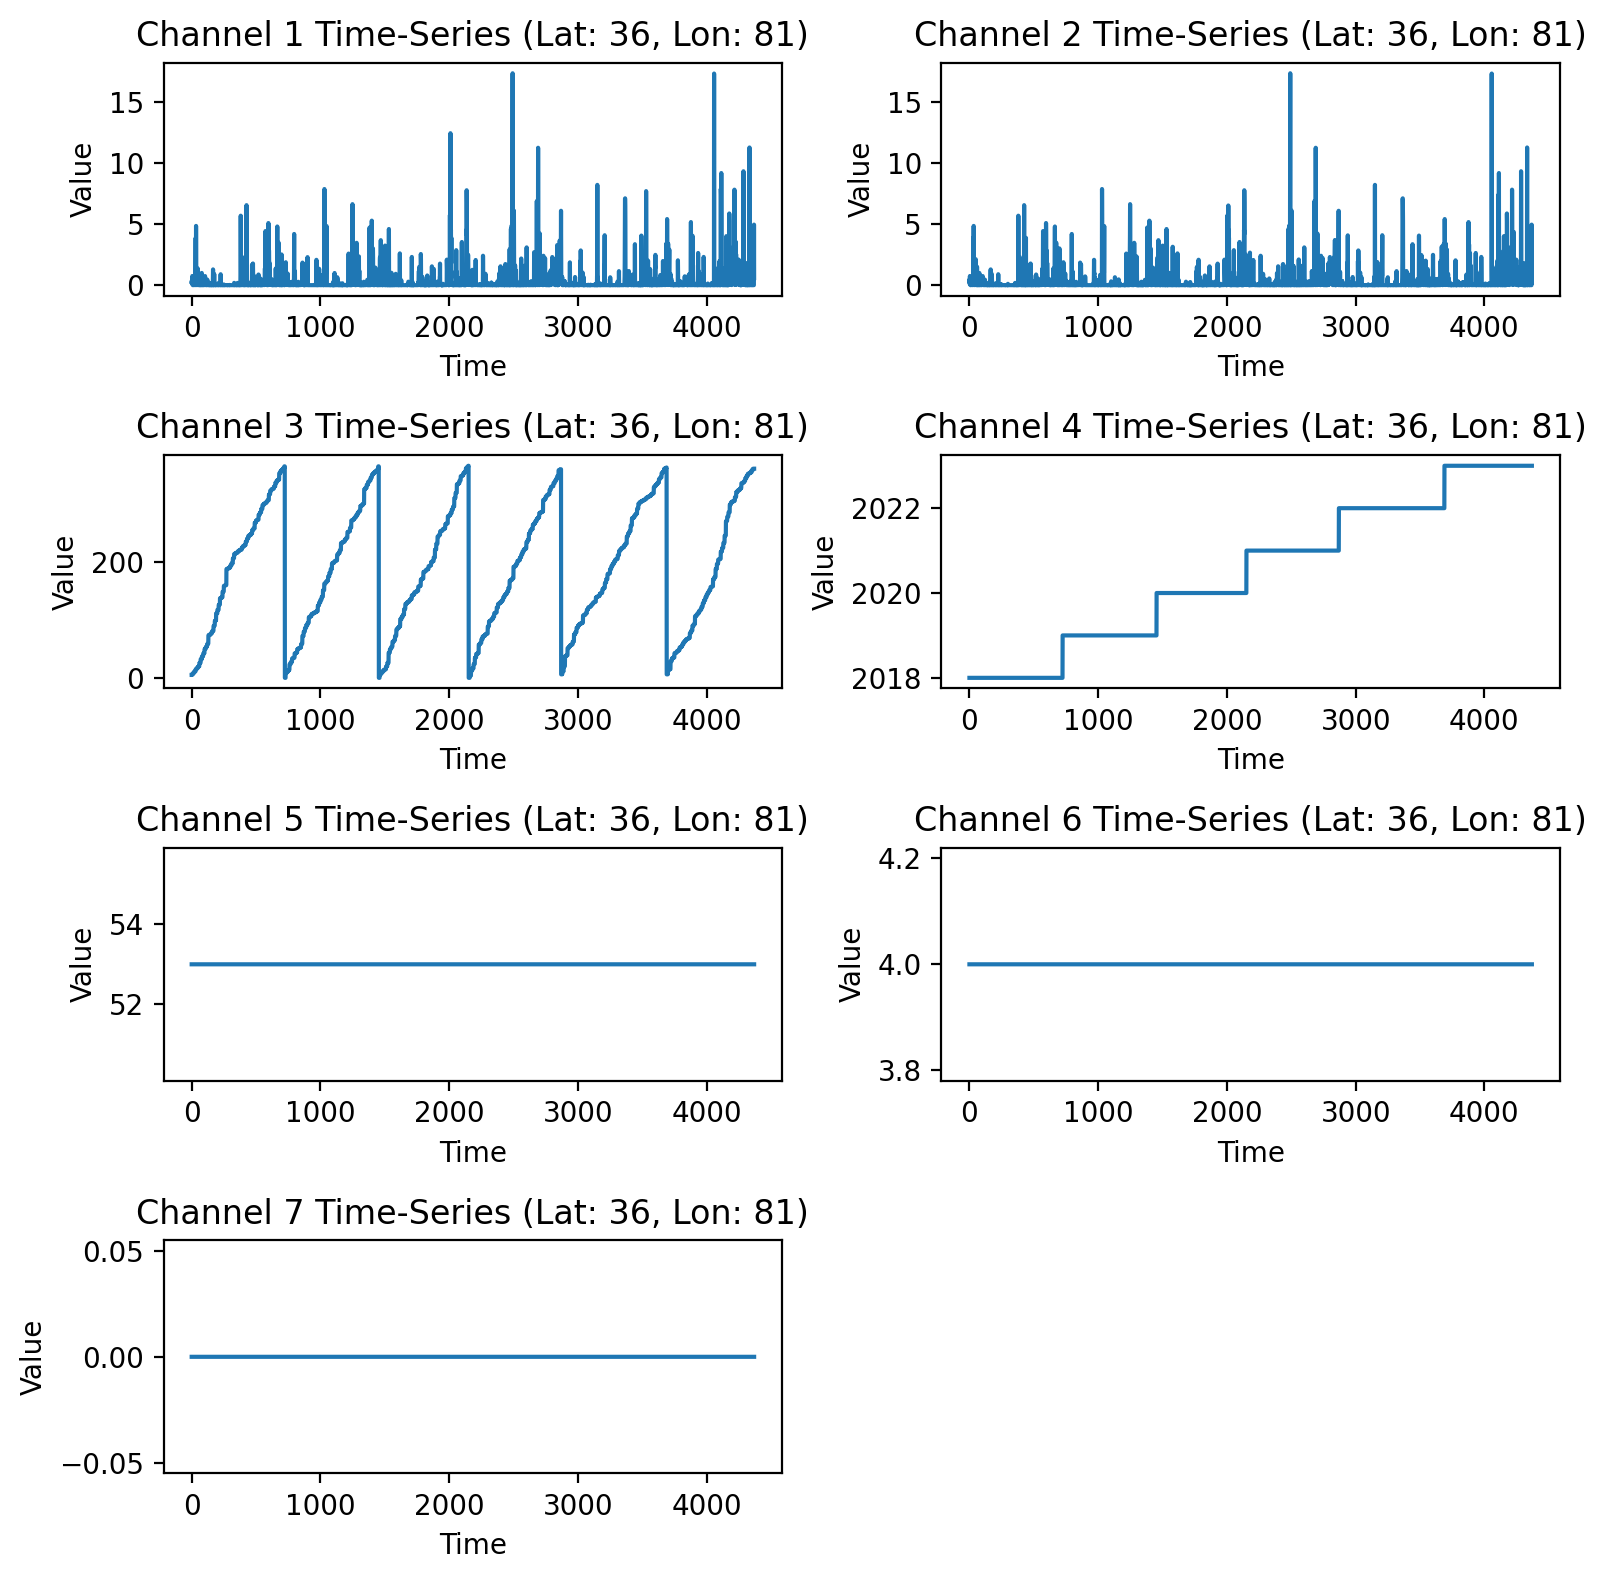

In [17]:
import random
import matplotlib.pyplot as plt

# Select a random pixel (latitude and longitude)
random_lat = random.randint(0, train_x.shape[1]-1)
random_lon = random.randint(0, train_x.shape[2]-1)

# Set the number of columns for the panel
n_columns = 2

# Calculate the number of rows needed based on the number of channels
n_rows = (n_channels + n_columns - 1) // n_columns

# Create the panel of subplots
fig, axes = plt.subplots(n_rows, n_columns, figsize=(8, 8), dpi=200)

# Flatten the axes array if it has more than one dimension
if n_rows > 1:
    axes = axes.flatten()

# Plot time-series for the random pixel in all channels
for channel_idx in range(n_channels):
    # Select the current axis for the subplot
    ax = axes[channel_idx]

    # Get channel data
    channel_data = val_x[:, random_lat, random_lon, channel_idx]

    # Plot the channel time-series
    ax.plot(channel_data)
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')
    ax.set_title(f"Channel {channel_idx+1} Time-Series (Lat: {random_lat}, Lon: {random_lon})")

# Hide any empty subplots
for i in range(n_channels, n_rows * n_columns):
    axes[i].axis('off')

# Adjust spacing between subplots
fig.tight_layout()

# Display the panel of subplots
plt.show()


### 4. Check train/val indices:

In [ ]:
train_indices_path = PPROJECT_DIR + '/AI MODELS/00-UNET/' + data_unique_name + "_train_indices.npy"
val_indices_path = PPROJECT_DIR + '/AI MODELS/00-UNET/' + data_unique_name + "_val_indices.npy"

total_ind = np.arange(train_x.shape[0]+val_x.shape[0])
train_indices = np.load(train_indices_path)
val_indices = np.load(val_indices_path)

plt.plot(total_ind[train_indices], train_indices, '.', ms=1)
plt.plot(total_ind[val_indices], val_indices, '.', ms=1)

print("train_indices:")
print(train_indices)
print("val_indices:")
print(val_indices)

### 5. Check mask values:

#### 5.1 train_m

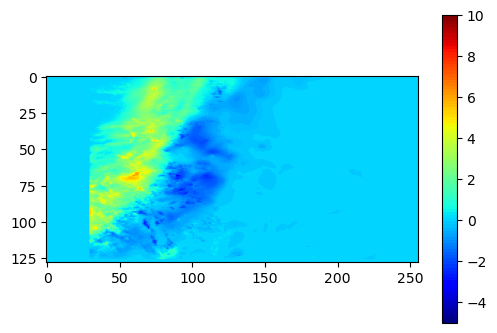

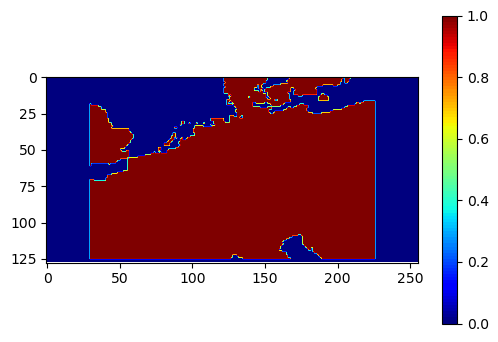

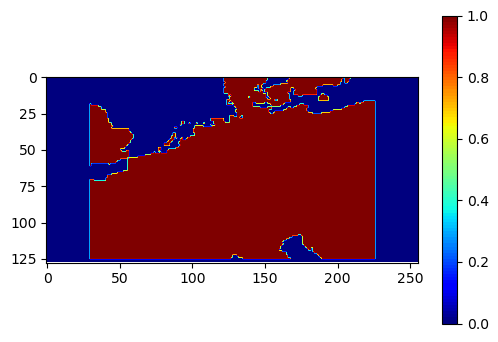

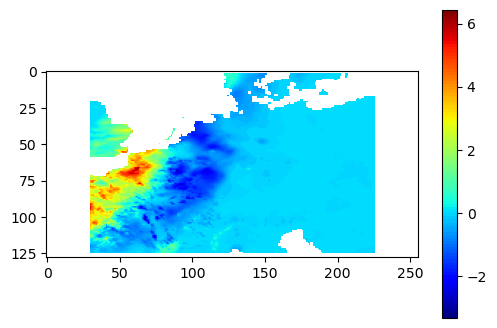

In [29]:
plt.close('all')  # Close the figure explicitly

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define the number of segments for the custom colormap
num_segments = 100
# Create a custom colormap with reduced segments based on 'jet' colormap
jet_segments = ListedColormap(plt.cm.jet(np.linspace(0, 1, num_segments)))

# Plot example maps for each channel
time_index = 50  # Specify the time index for the example maps
#mask_data = np.nanmean(train_m[..., :, :, 0], axis=0)
mask_data = train_m[time_index, :, :, 0]
channel_data = train_y[time_index, :, :, 0]
mean_mask = np.nanmean(train_m[:, :, :, 0], axis=0)
nan_ind = mask_data==0
mask_data_nanreplaced = mask_data*1
mask_data_nanreplaced[nan_ind]=np.nan

plt.figure(dpi=100, figsize=(6,4))
plt.imshow(channel_data, cmap=jet_segments, vmin=-5, vmax=10)
plt.colorbar()
plt.show()
plt.figure(dpi=100, figsize=(6,4))
plt.imshow(mask_data, cmap= jet_segments)
plt.colorbar()
plt.show()
plt.figure(dpi=100, figsize=(6,4))
plt.imshow(mean_mask, cmap=jet_segments)
plt.colorbar()
plt.show()
plt.figure(dpi=100, figsize=(6,4))
plt.imshow(mask_data_nanreplaced*channel_data, cmap=jet_segments)
plt.colorbar()
plt.show()

In [84]:
xlat=50
ylon=180

A=train_y[:, xlat, ylon]==-999.
B=train_m[:, xlat, ylon]==0

print(np.sum(A) == np.sum(B))
print(np.sum(A))

True
315


#### 5.2 val_m

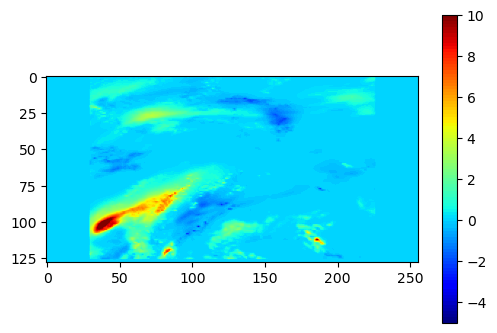

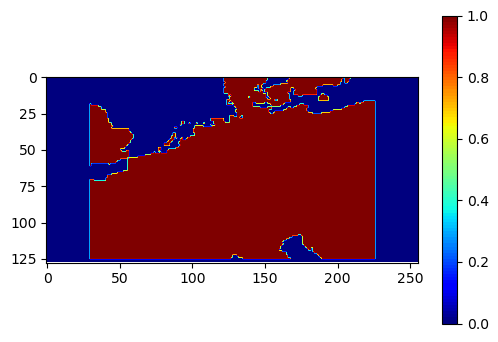

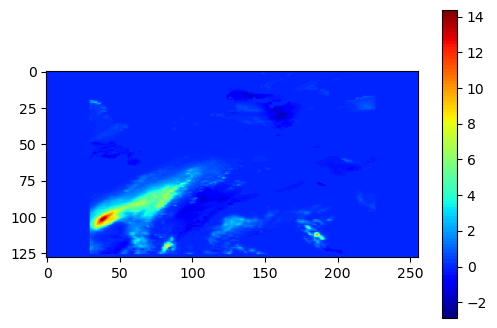

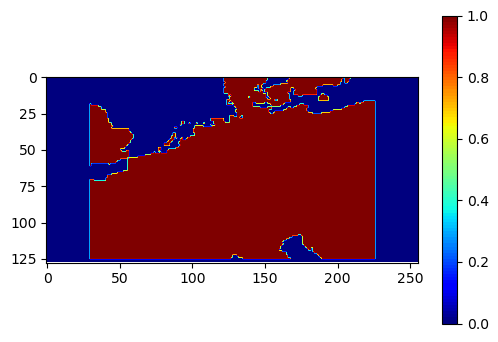

In [30]:
plt.close('all')  # Close the figure explicitly

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define the number of segments for the custom colormap
num_segments = 100
# Create a custom colormap with reduced segments based on 'jet' colormap
jet_segments = ListedColormap(plt.cm.jet(np.linspace(0, 1, num_segments)))

# Plot example maps for each channel
time_index = 2  # Specify the time index for the example maps
#mask_data = np.nanmean(train_m[.., :, :, 0], axis=0)
mask_data = val_m[time_index, :, :, 0]
channel_data = val_y[time_index, :, :, 0]
mean_mask = np.nanmean(val_m[:, :, :, 0], axis=0)
plt.figure(dpi=100, figsize=(6,4))
plt.imshow(channel_data, cmap=jet_segments, vmin=-5, vmax=10)
plt.colorbar()
plt.show()
plt.figure(dpi=100, figsize=(6,4))
plt.imshow(mask_data, cmap= jet_segments)
plt.colorbar()
plt.show()
plt.figure(dpi=100, figsize=(6,4))
plt.imshow(mask_data*channel_data, cmap=jet_segments)
plt.colorbar()
plt.show()
plt.figure(dpi=100, figsize=(6,4))
plt.imshow(mean_mask, cmap=jet_segments)
plt.colorbar()
plt.show()

In [86]:
xlat=50
ylon=180

A=val_y[:, xlat, ylon]==-999.
B=val_m[:, xlat, ylon]==0

print(np.sum(A) == np.sum(B))
print(np.sum(A))

True
337
